##**Data Importation and Loading**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Student Performance.csv to Student Performance.csv


##**Importing all Necessary Libraries**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##**Data Preprocessing**

In [18]:
df = pd.read_csv('Student Performance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [19]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
pivot = df.pivot_table(index = ['gender'],
                       values = ['math score', 'writing score', 'reading score'],
                       aggfunc = ['mean', 'sum', 'max', 'min', 'std', 'var']
                       )
print(pivot)

             mean                ...           var              
       math score reading score  ... reading score writing score
gender                           ...                            
female  63.633205     72.608108  ...    206.733938    220.369327
male    68.728216     65.473029  ...    194.095945    199.200248

[2 rows x 18 columns]


In [24]:
X = df.drop('math score', axis=1)
y = df['math score']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

##**Model Selection and Training**

In [33]:

pipeline = Pipeline(steps=[('preprocess', preprocessor),
                           ('model', LinearRegression())])


In [38]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

##**Evaluating the Model's Metrics**

In [39]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


R-squared: 0.8804
Mean Squared Error: 29.0952
Mean Absolute Error: 4.2148


##**Prediction using Sample data**

In [41]:
import numpy as np
sample_data = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group c'],
    'parental level of education': ['high school'],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'reading score': [85],
    'writing score': [65]
})

prediction = pipeline.predict(sample_data)
print(prediction)

[61.46104712]


##**Visualizing the Model's prediction and Actual**

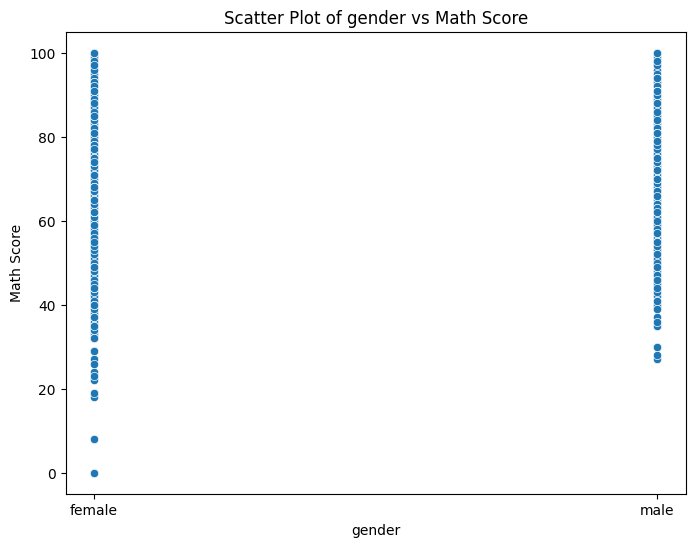

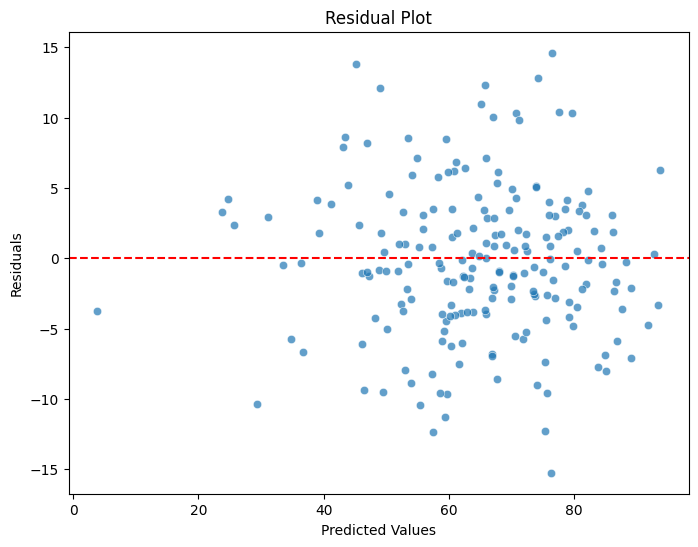

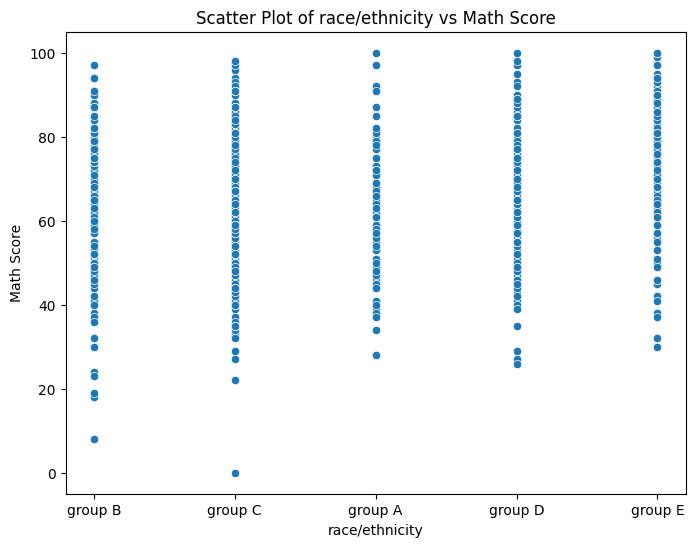

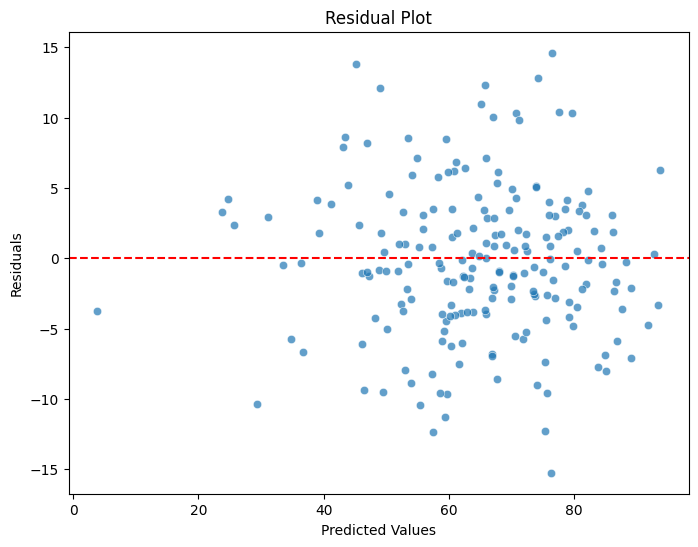

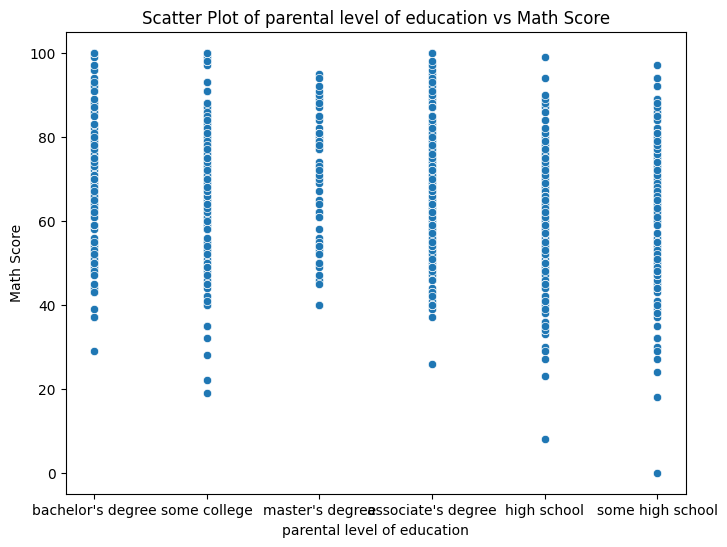

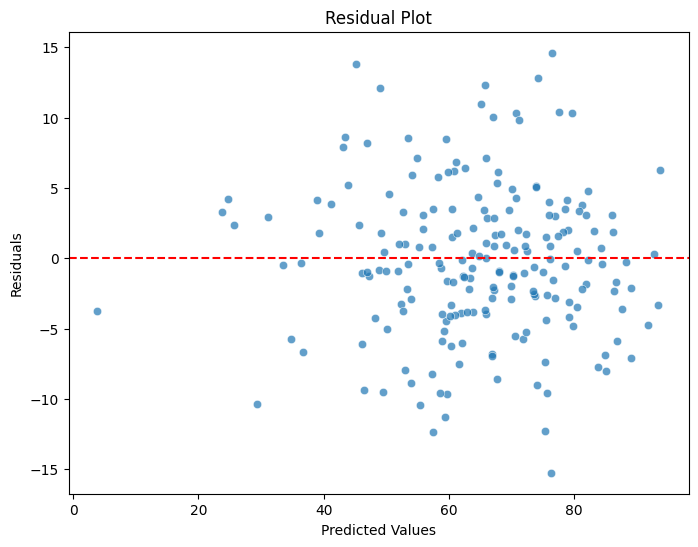

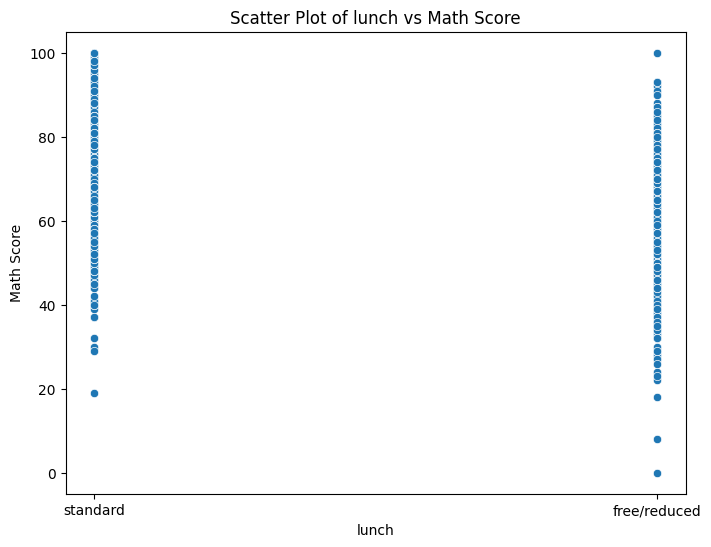

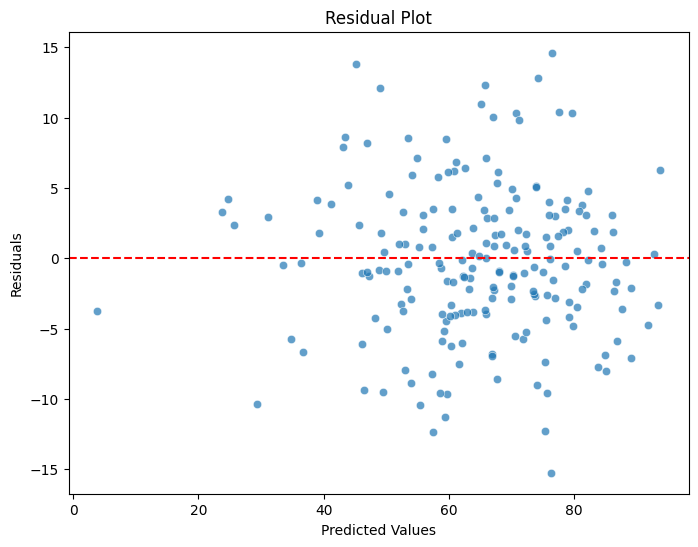

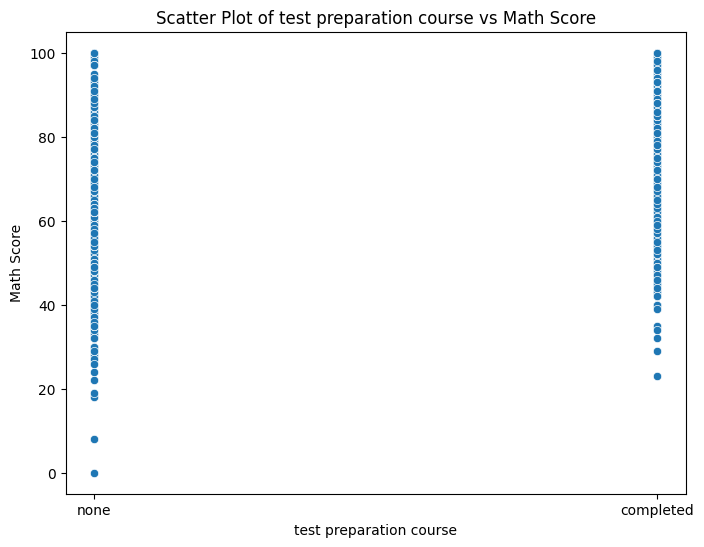

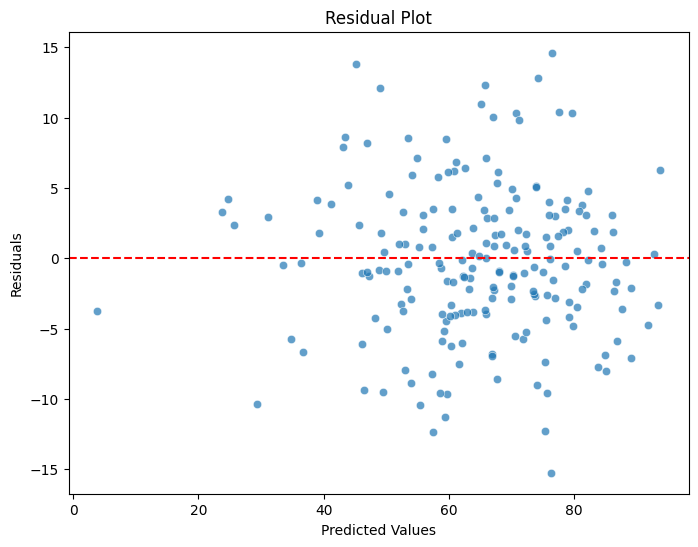

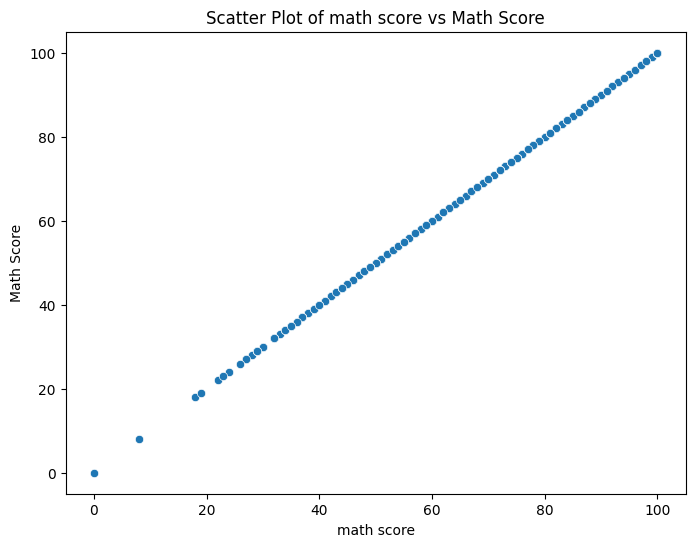

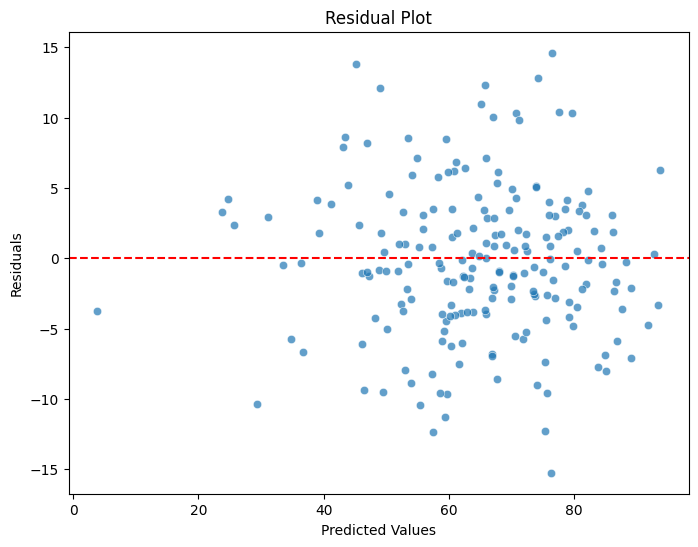

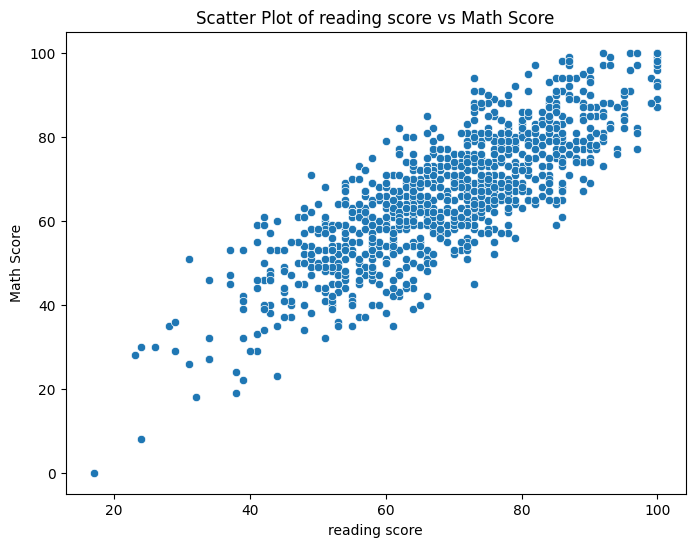

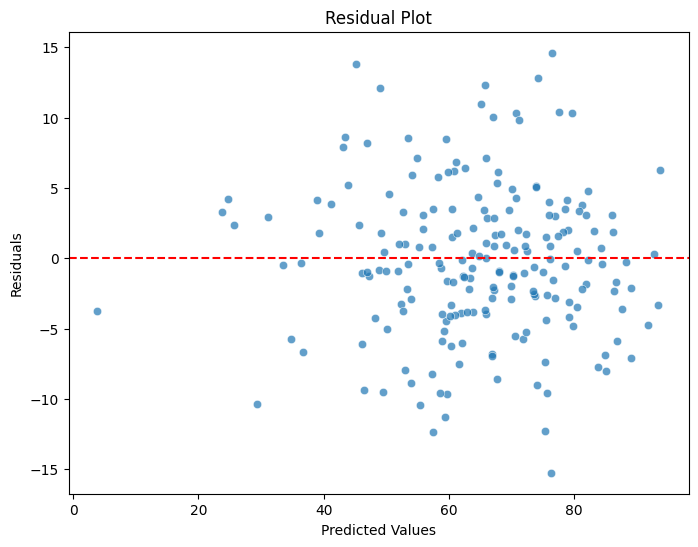

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns [:-1]:
  plt.figure(figsize=(8,6))
  sns.scatterplot(x=col, y='math score', data=df)
  plt.title(f'Scatter Plot of {col} vs Math Score')
  plt.xlabel(col)
  plt.ylabel('Math Score')
  plt.show()

  residuals = y_test - y_pred
  plt.figure(figsize=(8,6))
  sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
  plt.axhline(y=0, color='r', linestyle='--')
  plt.title(f'Residual Plot')
  plt.xlabel('Predicted Values')
  plt.ylabel('Residuals')
  plt.show()


##**Features Importance and Visualizations**

In [46]:
importance = pipeline.named_steps['model'].coef_
feature_imp = pd.Series(importance, index=numerical_features.tolist() + list(pipeline.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_features)))
feature_imp = feature_imp.sort_values(ascending=False)
print(feature_imp.head())

writing score             10.917190
gender_male                6.532442
race/ethnicity_group E     4.090025
reading score              3.411114
lunch_standard             1.755037
dtype: float64


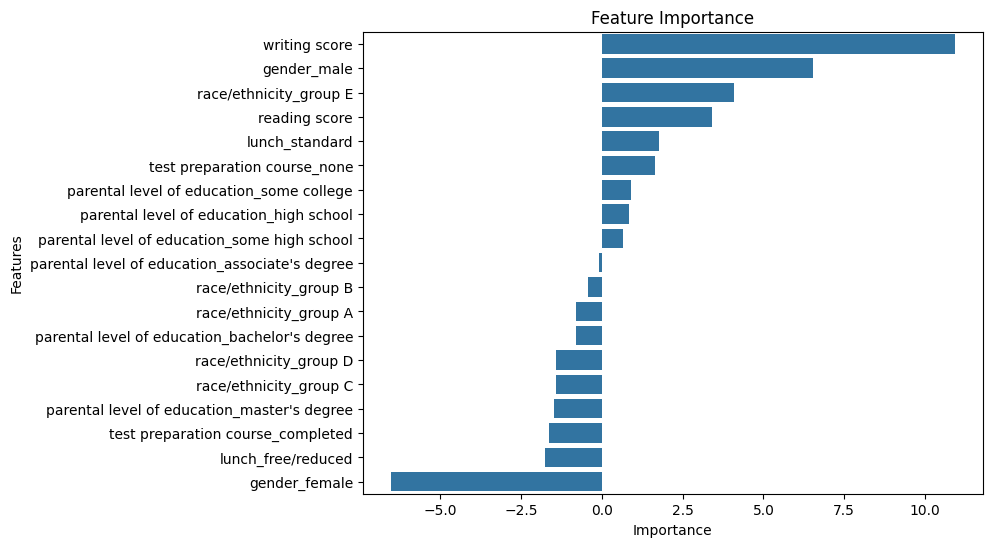

In [47]:
from matplotlib import pyplot as pyplot
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()